In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme('notebook')

In [37]:
leatherback_vs_leatherback_res = np.load('/home/isaacp/sharedrepos/IsaacLab-HARL/results/adversarial_paper_results/leatherback_vs_leatherback/all_results.npz')

In [38]:
list(leatherback_vs_leatherback_res.keys())

['episode_num',
 'Episode_Reward/team_0_score_reward',
 'Episode_Reward/team_0_ball_to_goal_reward',
 'Episode_Reward/team_0_timestep_reward',
 'Episode_Reward/team_1_score_reward',
 'Episode_Reward/team_1_ball_to_goal_reward',
 'Episode_Reward/team_1_timestep_reward',
 'Team0_Percent_Scored',
 'Team1_Percent_Scored']

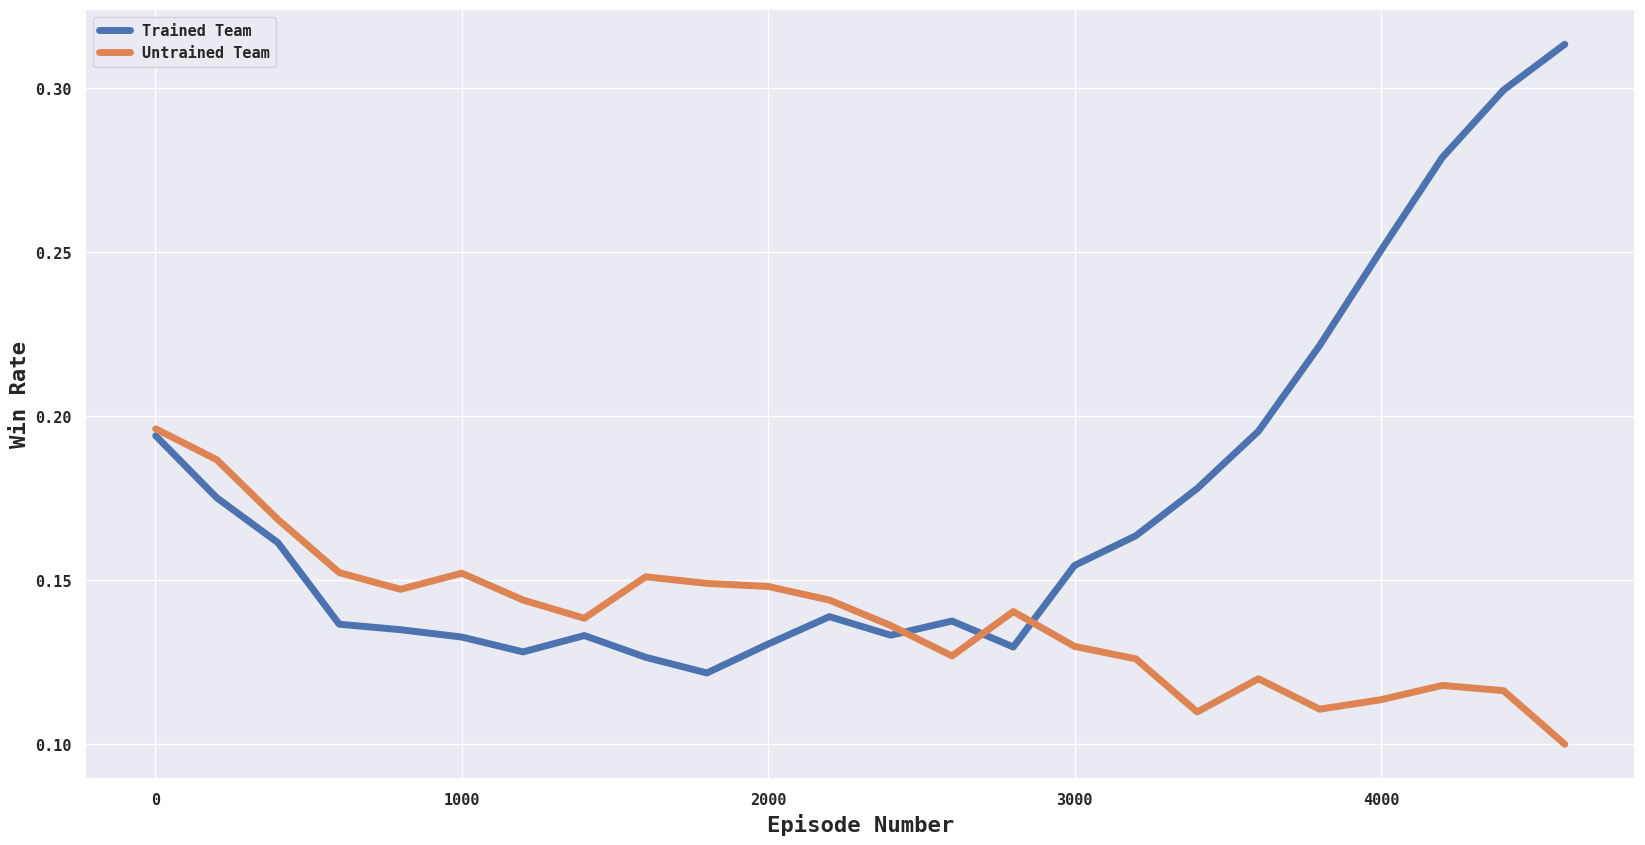

In [57]:
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(20,10))
plt.plot(leatherback_vs_leatherback_res['episode_num'], leatherback_vs_leatherback_res['Team0_Percent_Scored'], lw=5,label='Trained Team')
plt.plot(leatherback_vs_leatherback_res['episode_num'], leatherback_vs_leatherback_res['Team1_Percent_Scored'], lw=5,label='Untrained Team')
plt.xlabel('Episode Number', fontweight='bold', fontsize='16')
plt.ylabel('Win Rate', fontweight='bold', fontsize='16')
# plt.title("My Title", fontweight='bold', fontsize='20') 
plt.legend()
plt.show()

In [58]:
import pandas as pd

In [76]:
no_buffer = pd.read_csv('./buffer_results/happo_test_running_no_buffer.csv')
buffer_100 = pd.read_csv('./buffer_results/buffer_100.csv')

In [77]:
no_buffer.head()

,Wall time,Step,Value
0,1.757713e+09,800000,-14.616810
1,1.757713e+09,3200000,-136.870392
2,1.757713e+09,4000000,-171.666931
3,1.757713e+09,8800000,-137.530884
4,1.757713e+09,9600000,-128.882538


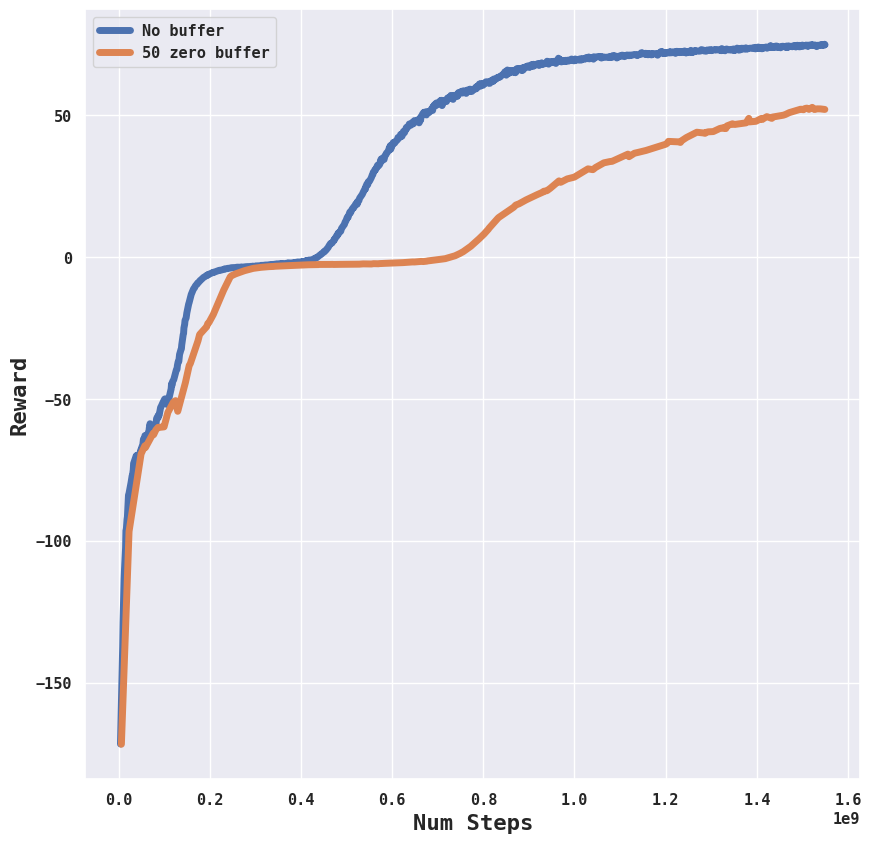

In [92]:
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,10))
max_x_val = len(no_buffer)
plt.plot(no_buffer['Step'][2:], no_buffer['Value'][2:], lw=5,label='No buffer')
plt.plot(buffer_100['Step'][:171], buffer_100['Value'][:171], lw=5,label='50 zero buffer')
# plt.yscale('log')
plt.xlabel('Num Steps', fontweight='bold', fontsize='16')
plt.ylabel('Reward', fontweight='bold', fontsize='16')
# plt.title("My Title", fontweight='bold', fontsize='20') 
plt.legend()
plt.show()

In [70]:
no_buffer['Value']

0      -14.616810
1     -136.870392
2     -171.666931
3     -137.530884
4     -128.882538
          ...    
995     74.840103
996     74.813568
997     74.622429
998     74.977631
999     74.805115
Name: Value, Length: 1000, dtype: float64